## Final Project Submission

Please fill out:
* Student name: Nyla Duperval
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:

## Lights, Camera, ACTION! 

Since the 1890s, the film industry has provided a gateway to learning, communion and exploration. With the advancement of technology, the film industry has changed specifically the monetary input. A successful file requires a sucessful a team of writers, cinematographers, editors etc. To determine if Microsoft should enter the film industry, lets take a look at how much does it will cost to make a successful movie. Success will be determined by the comparison of production budget and gross(domestic & worldwide).

In [128]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') 

## Data Cleaning

First, I have cleaned the data within the dataframe imported. I created a column to specify only the year of a movie release for easier indexing. I also removed the column 'id' and 'release_date'. The dataset did not have any NaN values. I checked for duplicates which showed movies with similar or the same movie title but we're release different years. Within the movie industry, movie remakes are common and can have very large timeframes. 

In [130]:
tn_budgets.shape

(5782, 6)

In [131]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [132]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
#Changed dtype for monetary sections

In [7]:
tn_budgets['release_date'] = tn_budgets['release_date'].str.replace(',', '')
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['Year'] = tn_budgets['release_date'].dt.year
#Changed dtype and created new column

In [8]:
tn_budgets = tn_budgets.drop('id', axis=1)
tn_budgets = tn_budgets.drop('release_date',1)

In [9]:
tn_budgets.dtypes

movie                 object
production_budget      int32
domestic_gross         int32
worldwide_gross      float64
Year                   int64
dtype: object

In [10]:
pd.set_option('display.max_rows',10)
tn_budgets.sort_values('movie', inplace=True)
bool_series = tn_budgets['movie'].duplicated()
tn_budgets[bool_series]
#There were no dupicate movies however duplicate names. They may be remakes or movies created with same name but different plots

,movie,production_budget,domestic_gross,worldwide_gross,Year
5614,"20,000 Leagues Under the Sea",200000,8000000,8000000.0,1916
5016,A Nightmare on Elm Street,1800000,25504513,25504513.0,1984
2032,Aladdin,28000000,217350219,504050219.0,1992
4759,Alice in Wonderland,3000000,0,0.0,1951
4120,Around the World in 80 Days,6000000,42000000,42000000.0,1956
...,...,...,...,...,...
5330,Trance,950000,0,0.0,2012
1588,Twilight,37000000,192769854,402280159.0,2008
2838,Unforgettable,18000000,2483790,2483790.0,1996
4583,Unknown,3700000,26403,3355048.0,2006


In [11]:
tn_budgets.isna().sum()
#All columns show no NaN values 

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Year                 0
dtype: int64

Text(0.5, 0, 'Production Budget')

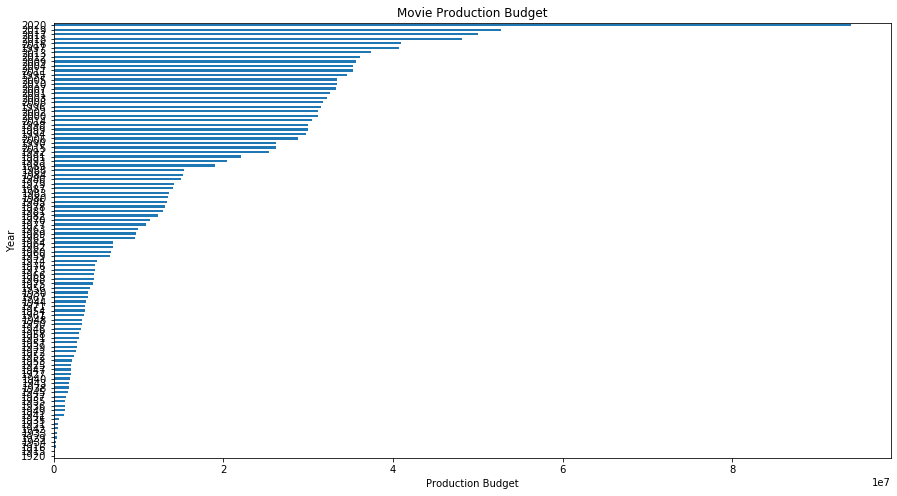

In [12]:
tn_budgets.groupby(['Year'])['production_budget'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Movie Production Budget')
plt.xlabel('Production Budget')
#From this graph we can see as time passes the average amount of production budgets also increase. Lets dig a little deeper!

## Data Exploration 

Through my exploration of the data, I separated my data into two focus groups: 
    Focus group 1: Movies with a domestic and worldwide gross
    Focus group 2: Movies without a domestic and worldwide gross

I thought this was important to seperate in order to compare the budgets to those whom gained revenue and those whom did not. The first focus group showed a large dataset of 5234 movies while the second focus group showed 367 movies. Based on this information, there were more movies with a form of revenue than those without any earned. Since the technological advancements that have occurred rapidly within the movie industry, I decided to focus on last 5 years to gather an accurate picture of the industry today. 

In [13]:
mark_gross = tn_budgets[(tn_budgets['domestic_gross'] > 0) & (tn_budgets['worldwide_gross'] > 0)].sort_values(by='Year')
mark_gross.shape


(5234, 5)

In [14]:
dw_gross = mark_gross.sample(n=358, replace = False)
dw_gross.shape
#I choose a sample size of 358 based on research on the best sample size for this amount of data

(358, 5)

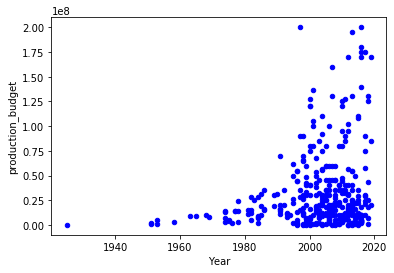

In [15]:
dw_gross.plot(kind='scatter', x='Year', y='production_budget', color='blue')
plt.show()

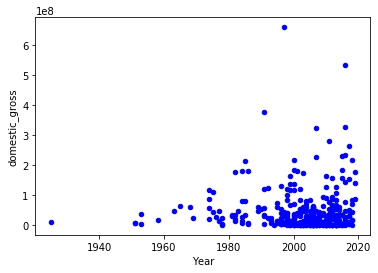

In [16]:
dw_gross.plot(kind='scatter', x='Year', y='domestic_gross',color='blue')

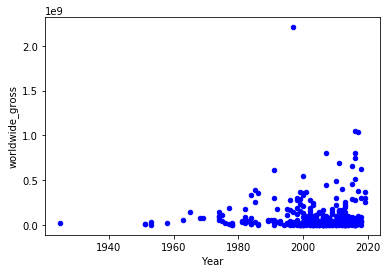

In [17]:
dw_gross.plot(kind='scatter', x='Year', y='worldwide_gross',color='blue')

In [104]:
sample_yr = dw_gross[(dw_gross['Year'] >= 2015) & (dw_gross['Year'] <= 2020)].sort_values(by='Year')
sample_yr.set_index('Year')
#A 5 year timeframe was chosen to give a more recent outlook on the industry. 

,movie,production_budget,domestic_gross,worldwide_gross
Year,,,,
2015,The Martian,108000000,228433663,655271443.0
2015,Legend,25000000,1872994,42425450.0
2015,Saul fia,1700000,1777043,9696537.0
2015,The Second Best Exotic Marigold Hotel,10000000,33078266,90384306.0
2015,The Water Diviner,22500000,4200117,31054727.0
...,...,...,...,...
2018,Skyscraper,125000000,68420120,304115534.0
2018,Mary Queen of Scots,25000000,16468499,46734733.0
2019,Shazam!,85000000,139606856,362899733.0


In [126]:
sample_yr.mean()

production_budget    4.754904e+07
domestic_gross       6.965881e+07
worldwide_gross      1.772361e+08
Year                 2.016385e+03
dtype: float64

In [106]:
mean_pro = sample_yr.groupby('Year')['production_budget'].mean()
mean_pro
#I created a new df with the average budget per year. 2015 has the lowest budget average.

Year
2015    3.022917e+07
2016    4.634286e+07
2017    5.691111e+07
2018    4.991429e+07
2019    9.166667e+07
Name: production_budget, dtype: float64

In [107]:
mean_dom = sample_yr.groupby('Year')['domestic_gross'].mean()
mean_dom
#I created a new df with the average domestic gross per year. 2019 was very successful. 

Year
2015    5.918557e+07
2016    7.052614e+07
2017    6.524109e+07
2018    6.337457e+07
2019    1.333969e+08
Name: domestic_gross, dtype: float64

In [108]:
mean_wor = sample_yr.groupby('Year')['worldwide_gross'].mean()
mean_wor
#I created a new df with the average worldwide gross per year. 2015-2018 worldwide gross are very proximate to each other.

Year
2015    1.447946e+08
2016    1.752759e+08
2017    1.929026e+08
2018    1.636344e+08
2019    3.054623e+08
Name: worldwide_gross, dtype: float64

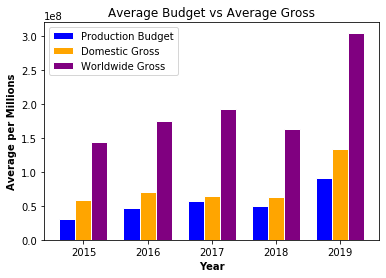

In [115]:
barWidth = 0.25
#Bar width

r1 = np.arange(len(mean_pro))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Assign the position of bar on X axis

plt.bar(r1, mean_pro, color='blue', width=barWidth, edgecolor='white', label='Production Budget')
plt.bar(r2, mean_dom, color='orange', width=barWidth, edgecolor='white', label='Domestic Gross')
plt.bar(r3, mean_wor, color='purple', width=barWidth, edgecolor='white', label='Worldwide Gross')
#Utilzing df created from the sample df means to create plot

plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(mean_pro))], ['2015', '2016', '2017', '2018','2019'])
#Add xticks on the middle of bars

plt.ylabel('Average (in Millions)', fontweight='bold')

plt.title('Average Budget vs Average Gross')

plt.legend()
plt.show()
#Show plot

In [117]:
mark1_gross = tn_budgets[(tn_budgets['domestic_gross'] == 0) & (tn_budgets['worldwide_gross'] == 0 )].sort_values(by='Year')
mark1_gross.shape

(367, 5)

In [118]:
zero_gross = mark1_gross.sample(n=188, replace = False, random_state = 188)
zero_gross.shape
#I choose a sample size of 188 based on research on the best sample size for this amount of data

(188, 5)

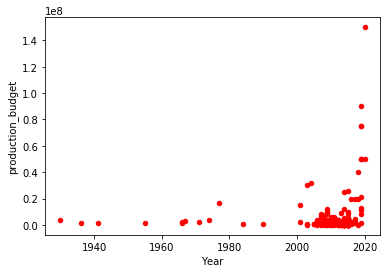

In [119]:
zero_gross.plot(kind='scatter', x='Year', y='production_budget', color='red')
#The scatter plot shows a large amount of data is located between 2000-2020. Lets investigate that area a bit more!

In [120]:
zero_yr = zero_gross[(zero_gross['Year'] >= 2015) & (zero_gross['Year'] <= 2020)].sort_values(by='Year')
zero_yr.groupby('Year')['production_budget'].mean()
#A 5 year timeframe was chosen to give a more recent outlook on the industry.

Year
2015    2.429285e+06
2016    5.320000e+06
2017    7.050000e+06
2018    1.993567e+07
2019    3.945500e+07
2020    1.000000e+08
Name: production_budget, dtype: float64

Text(0.5, 1.0, 'The Average Budget for Zero Revenue')

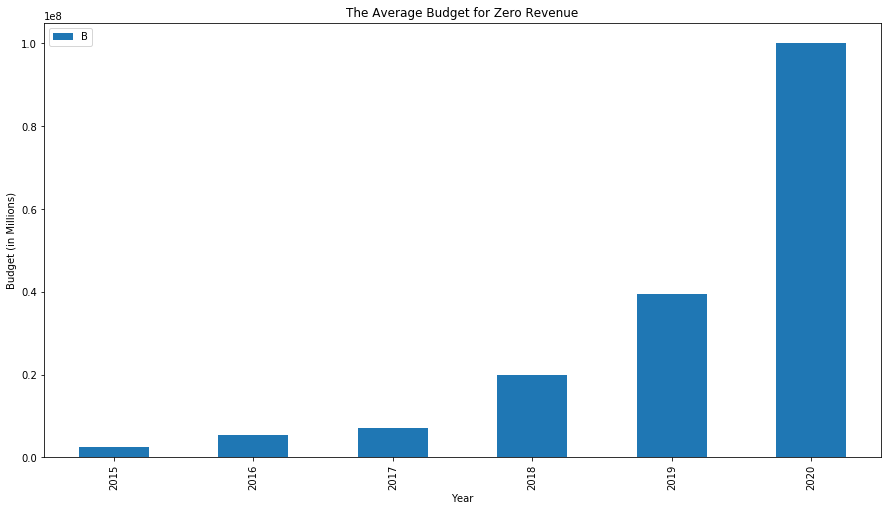

In [123]:
zero_yr.groupby('Year')['production_budget'].mean().sort_values().plot(kind='bar', figsize=(15,8))
plt.ylabel('Budget (in Millions)')
plt.legend('Budget')
plt.title('The Average Budget for Zero Revenue')
#Based on the graph, there movies had fairly large budgets however did not gain any revenue. 

## Conclusion

Based on my exploration, worldwide gross was substanial higher than production budgets. However, there was a small margin between production budgets and domestic gross. This can suggest within the United States there is a decrease in movie-goers or other outside factors. The largest average budget in focus group 1 was approximately 91 million dollars while the lowest average budget was approximately 30 million dollars. In focus group 2, the largest average budget was approximately 100 millions dollars and the lowest average budget was approximately. 

My recommendation is pursing a business venture into the movie industry is good venture to pursue. The movie industry is a lucrative business even though our world is increasing virtual content. Film award shows and festivals are held every year around global even as streaming sites become popular. I will also recommend further research into determining possible risk factors, such as streaming sites, affects on domestic gross and determining if these factors can have a positive or negative affect in the near future. 